In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

In [2]:
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

from scanmsupport.scanm.scanm_smp import SMP

In [6]:
scmf = SMP()

In [7]:
fname = "Z:\\Data\\Orlandic\\2024-03-15\\test_img1_2024-03-15.smp"
#fname = "scanmsupport\data\Q0_DN.smp"
_ = scmf.loadSMH(fname, verbose=False)

Processing file `Z:\Data\Orlandic\2024-03-15\test_img1_2024-03-15.smh`
Loading pre-header ...
Loading parameters (key-value pairs) ...
70 key-value pair(s) found
Correct parameters for older files ...
68 parameter(s) extracted
Done.


In [8]:
_ = scmf.loadSMP()

Processing file `Z:\Data\Orlandic\2024-03-15\test_img1_2024-03-15.smp`
Loading post-header ...
2 AI channel(s) (0b11)
2128 of 1000 buffer(s) (each 20864 pixels) per channel
2128 pixel bufs of 2128 read.
Done.


In [9]:
scmf.summary()

Summary
-------
Scan    : mode, type   : XYImage (0), 10
Pixel   : size         : 2 bytes/pixel
          duration     : 3.0 us (3.0)
Frame   : x-y size     : 652 x 512 pixels
          x-offset     : 56 pixels
          x-retrace    : 84 pixels
          count        : 133 recorded
          organisation : 16 pixel buffers/frame
Stimulus: # of buffers : 3
          mask         : 0111
Input   : # of channels: 2
          mask         : 0011
Zoom factor            : 0.15


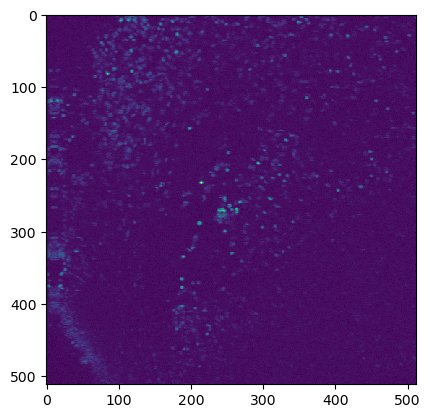

In [10]:
fr = scmf.getData(ch=0, crop=True)[5]

plt.imshow(fr, interpolation='nearest')
plt.show()

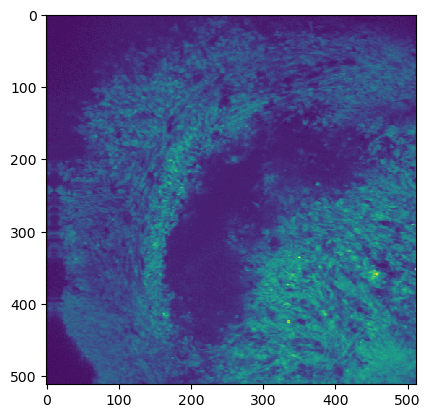

In [11]:
fr = scmf.getData(ch=1, crop=True)[0]

plt.imshow(fr, interpolation='nearest')
plt.show()

In [12]:
# Export to RGB tiff
#
import imageio
import os
import numpy as np

fn_tiff, _ = os.path.splitext(fname) 

video0 = scmf.getData(ch=0, crop=True)
pl, ph = np.percentile(video0, (0.5, 99.5))
ch0 = np.clip((video0 -pl) / (ph -pl) *255, 0, 255).astype(np.uint8)

video1 = scmf.getData(ch=1, crop=True)
pl, ph = np.percentile(video1, (0.5, 99.5))
ch1 = np.clip((video1 -pl) / (ph -pl) *255, 0, 255).astype(np.uint8)

ch2 = np.zeros((video0.shape), dtype=np.uint8)

stack = np.stack([ch0, ch1, ch2], axis=-1)

imageio.volwrite(fn_tiff +"1.tiff", stack)


NameError: name 'video0' is not defined

In [53]:
# Show channel as video
#
video = scmf.getData(ch=1, crop=True)

fig = plt.figure()
im = plt.imshow(video[0,:,:])

plt.close() # this is required to not display the generated image

def init():
    im.set_data(video[0,:,:])

def animate(i):
    im.set_data(video[i,:,:])
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],
                               interval=50)
HTML(anim.to_html5_video())

(3, 133, 512, 512)